In [1]:
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1100,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],
    random_state=42
)

minority_indices = np.where(y == 1)[0]
p_index = np.random.choice(minority_indices)
p = X[p_index]
p


array([0.76917845, 1.23163724])

In [2]:
from sklearn.neighbors import NearestNeighbors

k = 5
minority_points = X[minority_indices]

nbrs = NearestNeighbors(n_neighbors=k+1).fit(minority_points)
distances, indices = nbrs.kneighbors([p])

knn_indices = indices[0][1:]
knn_points = minority_points[knn_indices]
knn_points
print(knn_indices)

[50 16  1 29 20]


In [3]:

selected_neighbor = knn_points[np.random.randint(0, len(knn_points))]

# Linear interpolation -- yeni sentetik nokta
t = np.random.rand()
s = p + t * (selected_neighbor - p)

# Initialize synthetic_samples if it hasn't been defined yet, or if it's not a list.
if 'synthetic_samples' not in locals() and 'synthetic_samples' not in globals() or not isinstance(synthetic_samples, list):
    synthetic_samples = []

synthetic_samples.append(s)

In [4]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

k = 5
minority_label = 1

X_min = X[y == minority_label]
X_maj = X[y != minority_label]

needed = len(X_maj) - len(X_min)
synthetic_samples = []

nbrs = NearestNeighbors(n_neighbors=k+1).fit(X_min)

for _ in range(needed):
    p_index = np.random.randint(0, len(X_min))
    p = X_min[p_index]

    distances, indices = nbrs.kneighbors([p])
    knn_indices = indices[0][1:]
    knn_points = X_min[knn_indices]

    selected_neighbor = knn_points[np.random.randint(0, len(knn_points))]

    t = np.random.rand()
    s = p + t * (selected_neighbor - p)
    synthetic_samples.append(s)

synthetic_samples = np.array(synthetic_samples)

X_balanced = np.vstack([X, synthetic_samples])
y_balanced = np.hstack([y, np.full(len(synthetic_samples), minority_label)])


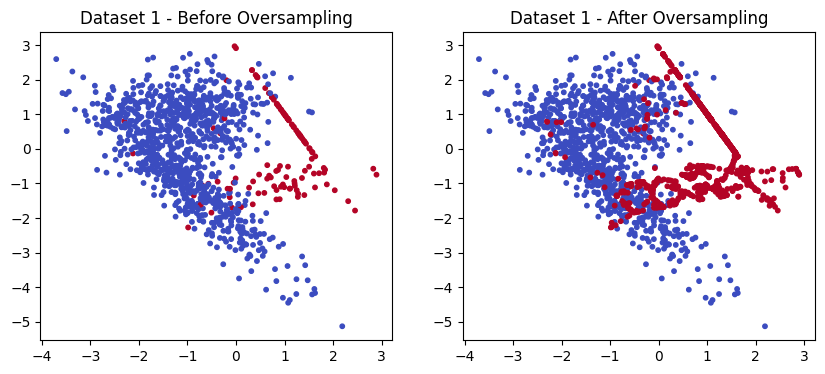

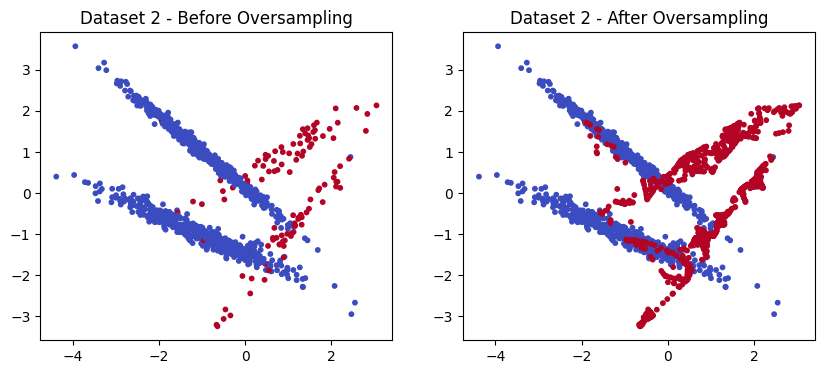

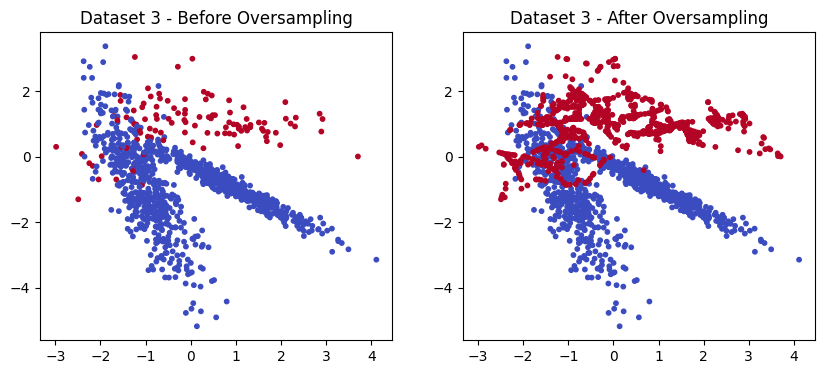

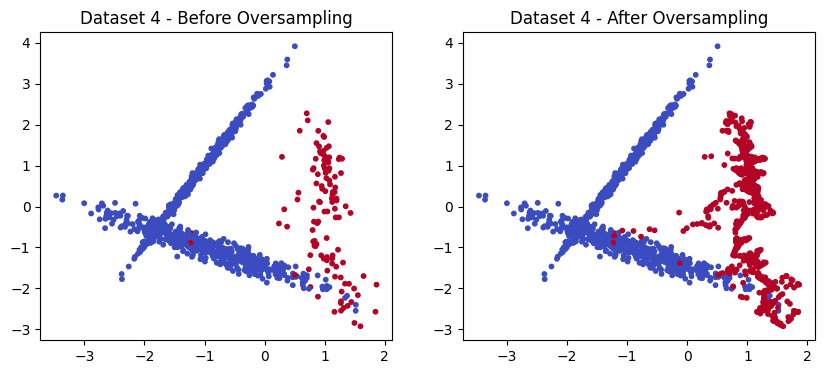

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression

def oversample_knn_linear(X, y, minority_label=1, k=5):
    X_min = X[y == minority_label]
    X_maj = X[y != minority_label]

    needed = len(X_maj) - len(X_min)
    synthetic_samples = []

    nbrs = NearestNeighbors(n_neighbors=k+1).fit(X_min)

    for _ in range(needed):
        p_index = np.random.randint(0, len(X_min))
        p = X_min[p_index]

        distances, indices = nbrs.kneighbors([p])
        knn_indices = indices[0][1:]
        knn_points = X_min[knn_indices]

        selected_neighbor = knn_points[np.random.randint(0, len(knn_points))]

        t = np.random.rand()
        s = p + t * (selected_neighbor - p)

        synthetic_samples.append(s)

    synthetic_samples = np.array(synthetic_samples)

    X_bal = np.vstack([X, synthetic_samples])
    y_bal = np.hstack([y, np.full(len(synthetic_samples), minority_label)])

    return X_bal, y_bal


def evaluate_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    return (
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_prob)
    )


results_before = []
results_after = []

all_datasets = []
all_balanced_datasets = []

for seed in range(5):
    X, y = make_classification(
        n_samples=1100, n_features=2,
        n_informative=2, n_redundant=0,
        weights=[0.9, 0.1], random_state=seed
    )

    all_datasets.append((X, y))
    X_bal, y_bal = oversample_knn_linear(X, y)
    all_balanced_datasets.append((X_bal, y_bal))

    prec_b, rec_b, f1_b, auc_b = evaluate_model(X, y)
    results_before.append([prec_b, rec_b, f1_b, auc_b])

    X_bal, y_bal = oversample_knn_linear(X, y)

    prec_a, rec_a, f1_a, auc_a = evaluate_model(X_bal, y_bal)
    results_after.append([prec_a, rec_a, f1_a, auc_a])

    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=10)
    plt.title(f"Dataset {seed+1} - Before Oversampling")

    plt.subplot(1, 2, 2)
    plt.scatter(X_bal[:, 0], X_bal[:, 1], c=y_bal, cmap='coolwarm', s=10)
    plt.title(f"Dataset {seed+1} - After Oversampling")

    plt.show()

results_before, results_after


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# -------------------------
# CLASS DISTRIBUTION
# -------------------------
print("Before Oversampling Class Distribution:")
print(pd.Series(y).value_counts())

print("\nAfter Oversampling Class Distribution:")
print(pd.Series(y_bal).value_counts())


# -------------------------
# FEATURE SCALING
# -------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_bal_scaled = scaler.fit_transform(X_bal)


# -------------------------
# RESULTS TABLE
# -------------------------

# DataFrame oluştur
df_before = pd.DataFrame(results_before, columns=["Precision", "Recall", "F1", "AUC"])
df_after = pd.DataFrame(results_after, columns=["Precision", "Recall", "F1", "AUC"])


# 5 dataset satırı için özel index isimleri
dataset_names = [f"Dataset {i+1}" for i in range(5)]
df_before.index = dataset_names
df_after.index = dataset_names


# Average satırını ekle
df_before.loc["Average"] = df_before.mean()
df_after.loc["Average"] = df_after.mean()

# Tabloları göster
print("========== RESULTS BEFORE OVERSAMPLING ==========")
display(df_before)

print("========== RESULTS AFTER OVERSAMPLING ==========")
display(df_after)


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

for i, (X_bal_ds, y_bal_ds) in enumerate(all_balanced_datasets):
    X_train, X_test, y_train, y_test = train_test_split(X_bal_ds, y_bal_ds, test_size=0.3, random_state=42)
    model = LogisticRegression().fit(X_train, y_train)

    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    plt.plot(fpr, tpr, label=f"Dataset {i+1}")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.title("ROC Curves for All Datasets")
plt.legend()
plt.show()


In [ ]:
import pandas as pd

print("========== CLASS DISTRIBUTIONS FOR ALL 5 DATASETS ==========\n")

for i, (X_ds, y_ds) in enumerate(all_datasets):
    print(f"Dataset {i+1} Class Counts:")
    print(pd.Series(y_ds).value_counts())
    print("---------------------------------------")

print("\n========== CLASS DISTRIBUTIONS AFTER OVERSAMPLING ==========\n")

for i, (X_bal_ds, y_bal_ds) in enumerate(all_balanced_datasets):
    print(f"Dataset {i+1} Class Counts After Oversampling:")
    print(pd.Series(y_bal_ds).value_counts())
    print("---------------------------------------")

